# Import all libraries and dataset

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
from sklearn import set_config
set_config(display='diagram', transform_output='pandas')

In [12]:
df = pd.read_csv('train.csv')
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df = df[['Age', 'Fare', 'Survived']]
df.sample(3)

,Age,Fare,Survived
804,27.0,6.975,1
770,24.0,9.500,0
385,18.0,73.500,0


In [15]:
df.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [ ]:
# Mean imputation 
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\Rudra\AppData\Local\Temp\ipykernel_1168\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [ ]:
df.fillna({
    df['Age'] : df['Age'].mean(),
}, inplace=True)

In [22]:
df.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

# Train Test Split

In [27]:
X = df.iloc[:, :2]
y = df.iloc[:, -1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
cols = df[['Age', 'Fare']]

In [31]:
cols

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


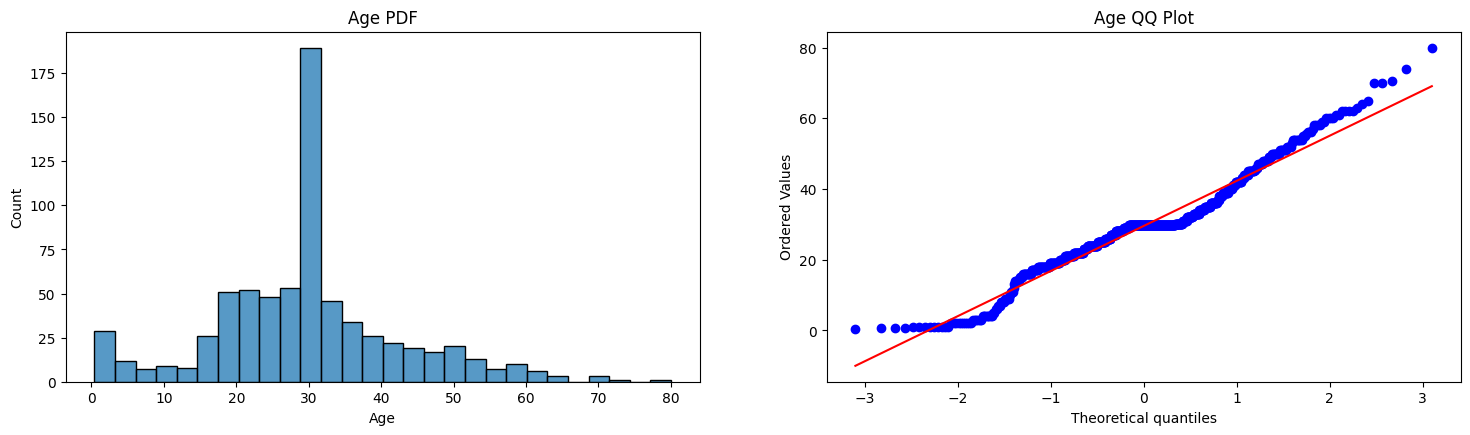

In [66]:
fig = plt.figure(figsize=(18, 10))

ax1 = fig.add_subplot(221)
sns.histplot(X_train['Age'], ax=ax1)
plt.title("Age PDF")

ax2 = fig.add_subplot(222)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("Age QQ Plot")
plt.show()

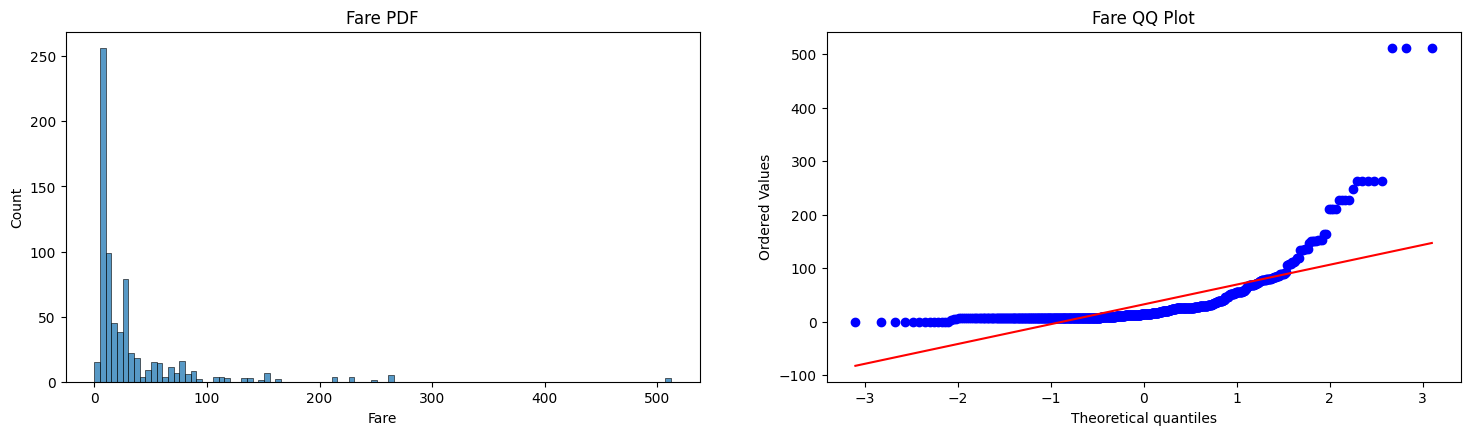

In [67]:
fig = plt.figure(figsize=(18, 10))

ax1 = fig.add_subplot(221)
sns.histplot(X_train['Fare'], ax=ax1)
plt.title("Fare PDF")

ax2 = fig.add_subplot(222)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Fare QQ Plot")
plt.show()

# Use algorithm Before Transformed

In [68]:
clf = LogisticRegression()
clf2  = DecisionTreeClassifier()

In [73]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print(f"Accuracy LR {accuracy_score(y_true=y_test, y_pred=y_pred)}")
print(f"Accuracy DT {accuracy_score(y_true=y_test, y_pred=y_pred1)}")


Accuracy LR 0.6480446927374302
Accuracy DT 0.6759776536312849


# After Transformed 

- `np.log` : If we have zero in column then it doesn't work properly
- `np.log1p` : This function add one in each number then find the log 

In [75]:
trf = FunctionTransformer(func=np.log1p)

In [78]:
X_train_transformed = trf.fit_transform(X_train)
X_train_transformed 

,Age,Fare
331,3.839452,3.384390
733,3.178054,2.639057
382,3.496508,2.188856
704,3.295837,2.180892
813,1.945910,3.474293
...,...,...
106,3.091042,2.157559
270,3.424234,3.465736
860,3.737670,2.715244
435,2.708050,4.795791


In [79]:
X_test_transformed = trf.transform(X_test)
X_test_transformed 

,Age,Fare
709,3.424234,2.787834
439,3.465736,2.442347
840,3.044522,2.188856
720,1.945910,3.526361
39,2.708050,2.504848
...,...,...
433,2.890372,2.094946
773,3.424234,2.107178
25,3.663562,3.477773
84,2.890372,2.442347


In [80]:
# Create an object on Model
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# train on the parameter
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

# predict
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf.predict(X_test_transformed)

# Now see what happen after function transformer
print(f"Accuracy LR {accuracy_score(y_true=y_test, y_pred=y_pred)}")
print(f"Accuracy DT {accuracy_score(y_true=y_test, y_pred=y_pred1)}")

Accuracy LR 0.6815642458100558
Accuracy DT 0.6815642458100558


In [86]:
# Check though the cross val score
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR :", np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print("DT :", np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))

LR : 0.678027465667915
DT : 0.6610861423220974


- If you compare before and after then see the accuracy is increase
- But in the decision tree algorithm nearly no changes
- Because it not affect by the function Transformer

# Function for quick viz and accuracy 

In [ ]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

In [ ]:
apply_transform(np.sin)